**Importing Libraries**

In [1]:
from transformers import pipeline
import os
import re                          # For regular expressions, used for text processing
from PIL import Image
import shutil                      # shutil is used for moving files between directories

**Setting up Image-to-Text Pipeline**

In [2]:
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

**Function to Extract Categories from Caption**

In [3]:
def extract_categories(caption):
    categories = []
    words = re.findall(r'\w+', caption.lower())
    for word in words:
        if word.endswith(('s', 'es')) or not word.endswith('s'):  
            if len(word) > 3:  
                categories.append(word)
    return set(categories)

**Predefined Category Names**

In [4]:
category_names = {
    'tree': 'nature images',
    'field': 'nature images',
    'lake': 'nature images',
    'plant': 'nature images',
    'flower': 'nature images',
    'dish': 'food images',
    'food': 'food images',
    'plate': 'food images',
    'drink': 'food images',
    'building': 'urban images',
    'city': 'urban images',
    'skyline': 'urban images',
    'street': 'urban images',
    'road': 'urban images',
    'car': 'urban images',
    'vehicle': 'urban images',}


**Directory Containing the Images**

In [5]:
image_dir = r"C:\Users\katku\Downloads\New"

**Creating Directories for Each Category**

In [6]:
for category in category_names.values():
    os.makedirs(os.path.join(image_dir, category), exist_ok=True)


**List all image files in the directory**

In [7]:
image_files = [filename for filename in os.listdir(image_dir) if filename.endswith((".jpg", ".jpeg", ".png"))]

**Generating Captions and Categorizing Images**

In [8]:
for image_file in image_files:
    # Load the image
    image_path = os.path.join(image_dir, image_file)
    image = Image.open(image_path)

    # Generate caption for the current image
    captions = pipe(image)
    generated_caption = captions[0]['generated_text']

    # Extract categories from the caption
    categories = extract_categories(generated_caption)

    # Map categories to predefined category names
    category_names_list = [category_names[category] for category in categories if category in category_names]

    # Move the image to the corresponding category folder
    for category_name in set(category_names_list):
        destination_folder = os.path.join(image_dir, category_name)
        shutil.move(image_path, os.path.join(destination_folder, image_file))

    # Print the image filename, generated caption, and category names
    print(f"Image: {image_file}, Caption: '{generated_caption}', Category Names: {', '.join(set(category_names_list))}")


F:\OFFICE\Lib\site-packages\transformers\generation\utils.py:1132: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Image: img-1.jpeg, Caption: 'a close up of a tree in a field near a lake', Category Names: nature image
Image: img-10.jpeg, Caption: 'arafed view of a city at night with a lot of traffic', Category Names: urban image
Image: img-11.jpeg, Caption: 'buildings in a city with a view of the city skyline', Category Names: urban image
Image: img-12.jpeg, Caption: 'arafficial city skyline at night with lights reflecting in the water', Category Names: urban image
Image: img-13.jpeg, Caption: 'buildings and a train on a track in a city', Category Names: urban image
Image: img-14.jpeg, Caption: 'there are many different dishes of food on the table', Category Names: food image
Image: img-15.jpeg, Caption: 'a table full of different types of food on plates', Category Names: food image
Image: img-16.jpeg, Caption: 'there are many people walking along the water in the city', Category Names: urban image
Image: img-17.jpeg, Caption: 'araffy table with a variety of dishes of food and a knife', Category N

**Output**

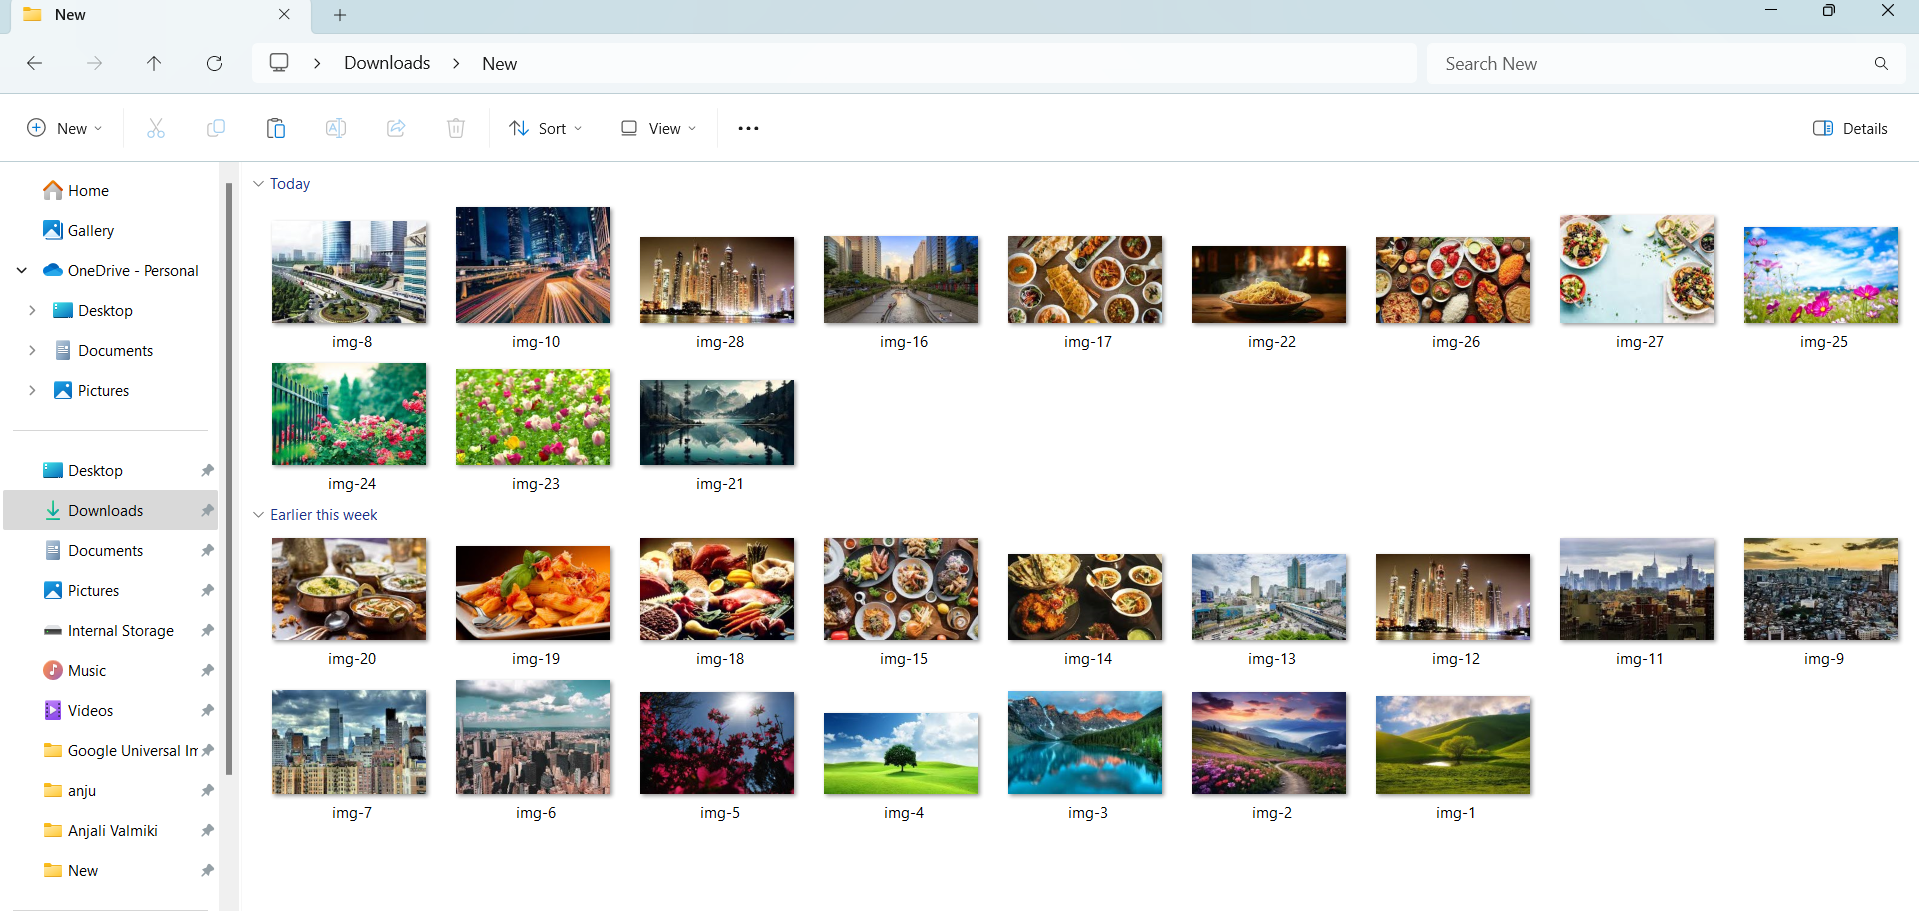

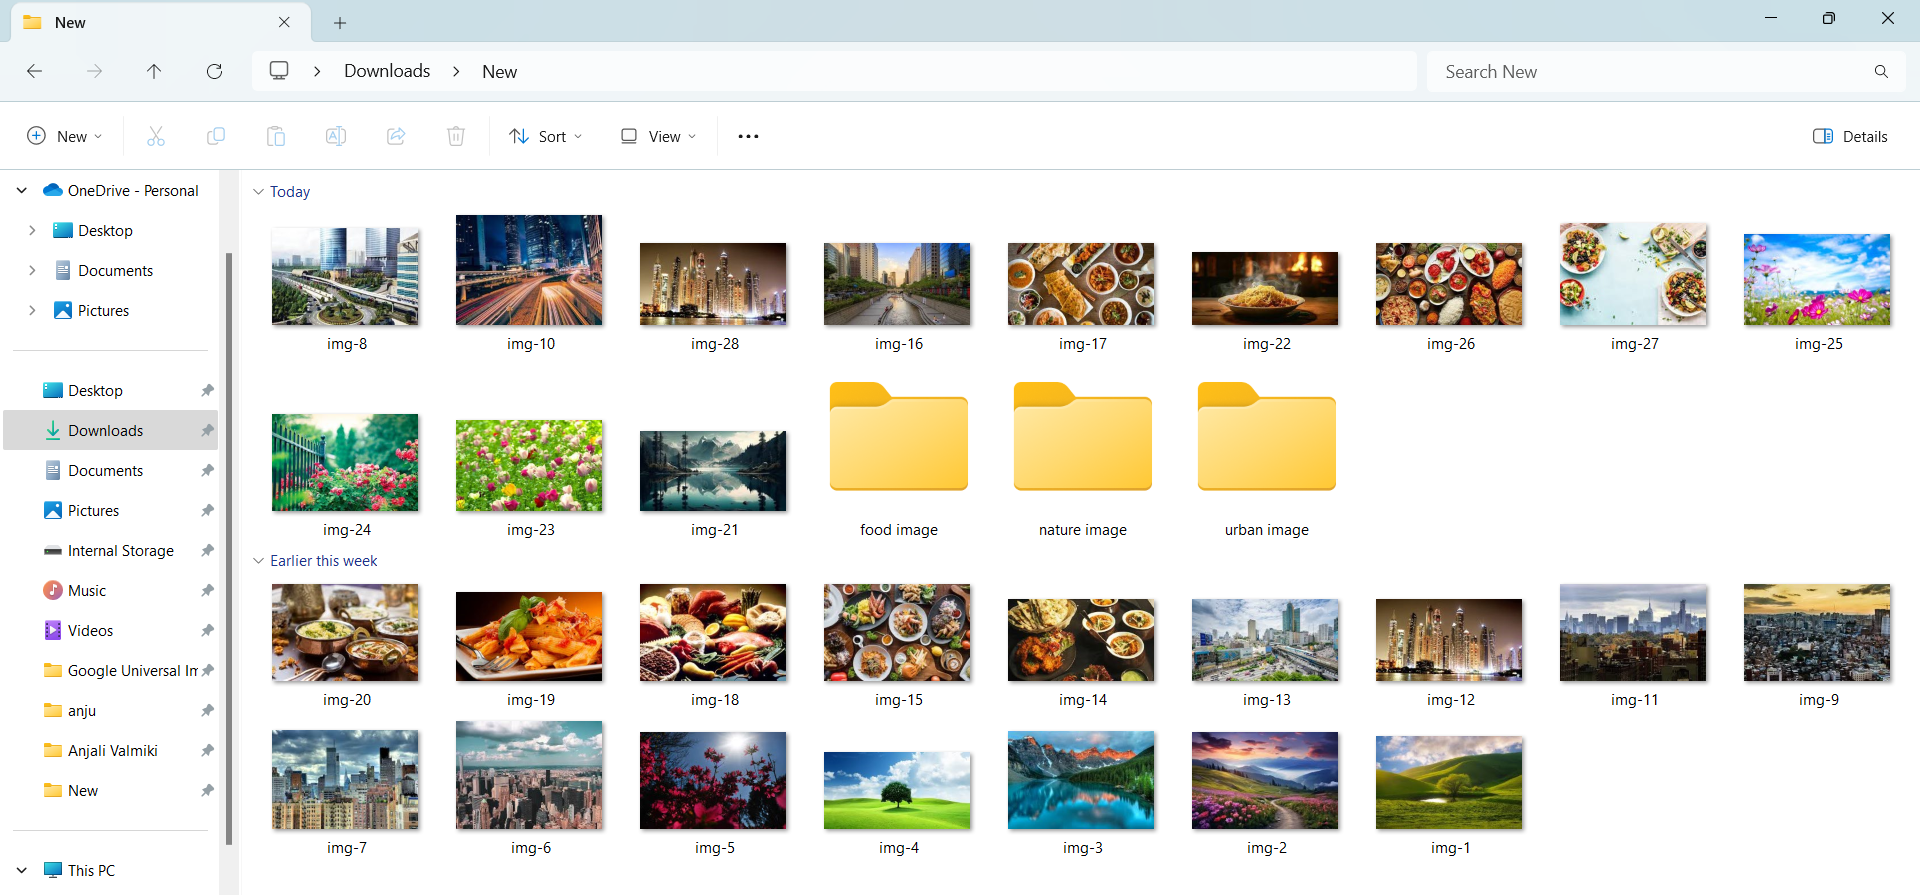

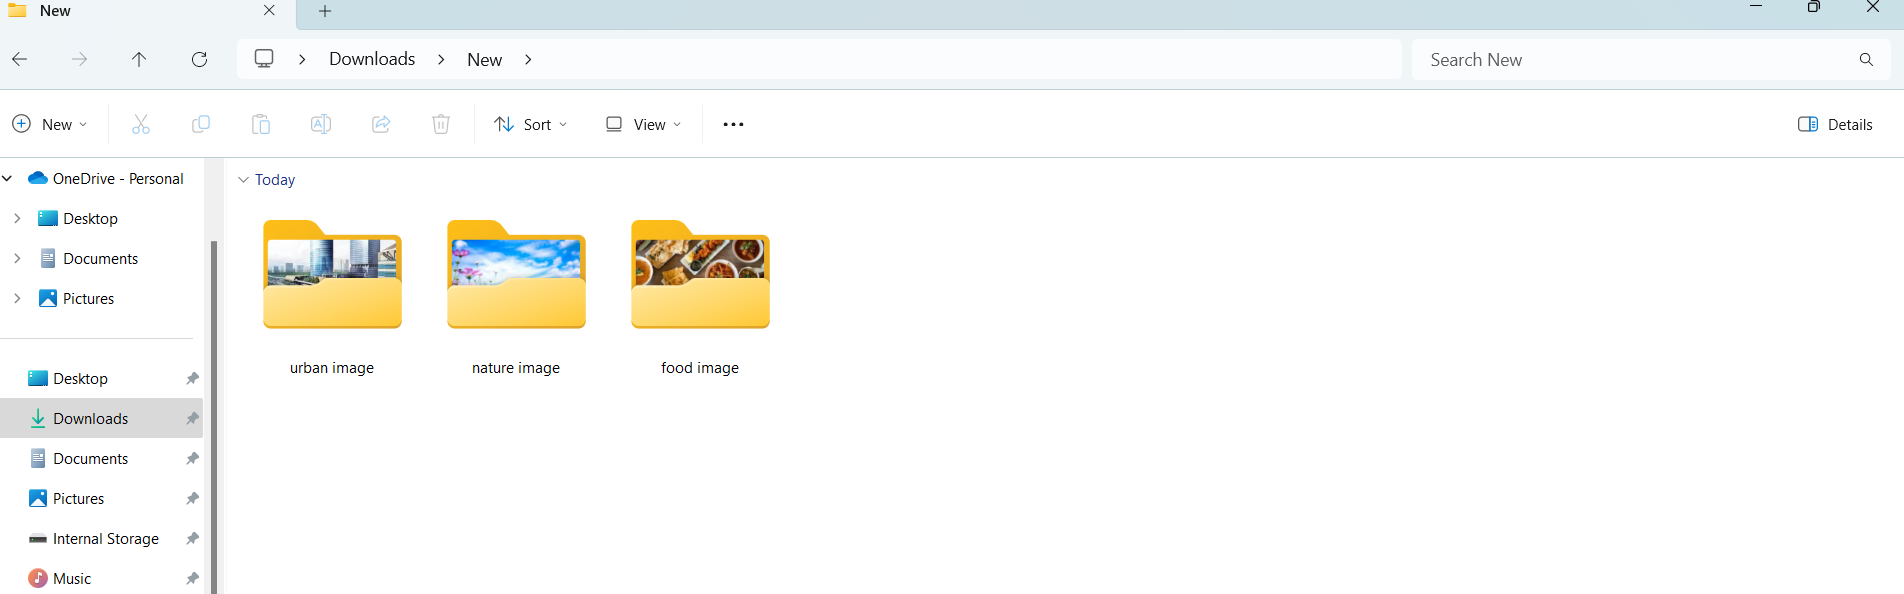

In [13]:
from IPython.display import Image, display

# Path to your image files
image_paths = [r"C:\Users\katku\OneDrive\Pictures\Screenshots\2.png",r"C:\Users\katku\OneDrive\Pictures\Screenshots\Screenshot (37)"".png",r"C:\Users\katku\OneDrive\Pictures\Screenshots\4.png"]

# Display each image
for path in image_paths:
    display(Image(filename=path))
